In [1]:
import os 
# Go one folder back
os.chdir('..')
from Python_scripts.data_processing import *


/Users/danyu/Documents/DTU/Bachelorprojekt/Bachelor_project/Python_scripts/data_processing.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ug_1['choose'][ug_1.choose != '�ܾ�'] = 1
/Users/danyu/Documents/DTU/Bachelorprojekt/Bachelor_project/Python_scripts/data_processing.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ug_1['choose'][ug_1.choose == '�ܾ�'] = 0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_processing_func()

/Users/danyu/Documents/DTU/Bachelorprojekt/Bachelor-project/Data processing/data_processing.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ug_1['choose'][ug_1.choose != '�ܾ�'] = 1
/Users/danyu/Documents/DTU/Bachelorprojekt/Bachelor-project/Data processing/data_processing.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ug_1['choose'][ug_1.choose == '�ܾ�'] = 0


([      Subject Context  proposer  receivor choose  Wait2.RT  targettext
  1          48    gain       6.0       4.0      1    1476.0         3.0
  2          48    gain       7.0       3.0      0     975.0         3.0
  3          48    gain       5.0       5.0      1     592.0         3.0
  4          48    gain       8.0       2.0      0     609.0         3.0
  5          48    gain       9.0       1.0      0     884.0         3.0
  ...       ...     ...       ...       ...    ...       ...         ...
  4601       48    loss      -2.0      -8.0      0     448.0         3.0
  4602       48    loss      -5.0      -5.0      1     363.0         3.0
  4603       48    loss      -1.0      -9.0      0     437.0         3.0
  4604       48    loss      -4.0      -6.0      1     596.0         3.0
  4605       48    loss      -3.0      -7.0      1     295.0         3.0
  
  [80 rows x 7 columns],
        Subject Context  proposer  receivor choose  Wait2.RT  targettext
  48         63    gain

In [11]:
path = '../Data/step3_format_csv/UG_wave1.csv'

ug_1 = pd.read_csv(path)  

# Delete all rows containing NaN
ug_1 = ug_1.dropna()

# Delete unnecessary columns
ug_1 = ug_1.drop(['SessionDate', 'SessionTime', 'type'], axis=1)

print(ug_1)

# Convert choose to 1 = accepted and 0 = rejected
ug_1['choose'][ug_1.choose != '�ܾ�'] = 1
ug_1['choose'][ug_1.choose == '�ܾ�'] = 0


      Subject Context  proposer  receivor choose  Wait2.RT  targettext
1          48    gain       6.0       4.0   ����    1476.0         3.0
2          48    gain       7.0       3.0    �ܾ�     975.0         3.0
3          48    gain       5.0       5.0   ����     592.0         3.0
4          48    gain       8.0       2.0    �ܾ�     609.0         3.0
5          48    gain       9.0       1.0    �ܾ�     884.0         3.0
...       ...     ...       ...       ...    ...       ...         ...
7233       96    loss      -1.0      -9.0    �ܾ�     669.0         1.0
7234       96    loss      -5.0      -5.0   ����     589.0         5.0
7235       96    loss      -2.0      -8.0    �ܾ�     895.0         1.0
7236       96    loss      -3.0      -7.0   ����    1241.0         4.0
7237       96    loss      -4.0      -6.0   ����    2105.0         4.0

[6160 rows x 7 columns]


<ipython-input-11-ecf0c3d16910>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ug_1['choose'][ug_1.choose != '�ܾ�'] = 1
<ipython-input-11-ecf0c3d16910>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ug_1['choose'][ug_1.choose == '�ܾ�'] = 0


In [4]:
# Find all unique subjects 
sub_unique = ug_1['Subject'].unique()

# Find number of subjects
number_of_subjects = len(sub_unique)

# Define subject specific dataframes
subjects_dataframe = [[]] * number_of_subjects
subjects_dataframe_gain = [[]] * number_of_subjects
subjects_dataframe_loss = [[]] * number_of_subjects


for i,subject in enumerate(sub_unique):
    subjects_dataframe[i] = ug_1.loc[ug_1['Subject'] == subject]
    subjects_dataframe_gain[i] = subjects_dataframe[i][subjects_dataframe[i].Context == 'gain']
    subjects_dataframe_loss[i] = subjects_dataframe[i][subjects_dataframe[i].Context == 'lose']

    


In [8]:
# Function to plot histogram
def plot_histogram(subject_range,individual_plots = True,custom_titel=None):
    x1_final=[]
    x2_final=[]
    for i in subject_range:
        x1 = list(subjects_dataframe_gain[i][subjects_dataframe_gain[i]['choose'] == 1]['receivor'])
        x2 = list(subjects_dataframe_gain[i][subjects_dataframe_gain[i]['choose'] == 0]['receivor'])
        
        if not(individual_plots):
            x1_final.append(x1)
            x2_final.append(x2)

        # Setting colors and names
        colors=['blue', 'orange']
        names=['Accepted', 'Rejected']
        
        # Creating plot with list values, colors and names (labels)
        # If plot for each subject
        if individual_plots:
            plt.hist([x1, x2], color=colors, label=names, density=False)
            
            # Set the legend and labels
            plt.legend()
            plt.xticks(range(1,6))
            if custom_titel==None:
                plt.title(f'Subject { list(subjects_dataframe_gain[i]["Subject"])[0]} index({i})')
            else:
                plt.title(custom_titel)
            plt.xlabel('Receivor payoff')
            plt.show()
    
    # If plot for more than 1 subject
    if not(individual_plots):
        x1 = []
        x2 = []
        [x1.extend(list) for list in x1_final]
        [x2.extend(list) for list in x2_final]
        plt.hist([x1, x2], color=colors, label=names, density=False)
        plt.legend()
        plt.xticks(range(1,6))
        if custom_titel==None:
            plt.title(f'Subject index({subject_range})')
        else:
            plt.title(custom_titel)
        
        plt.xlabel('Receivor payoff')
        plt.show()
  



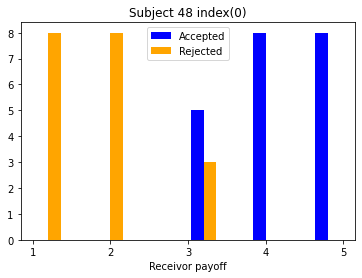

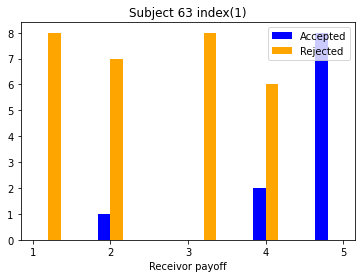

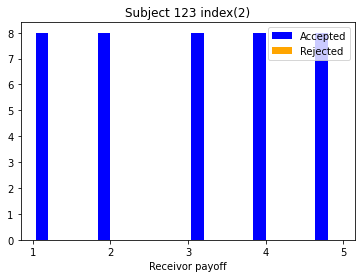

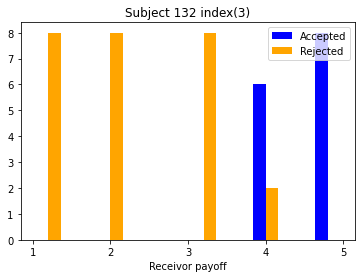

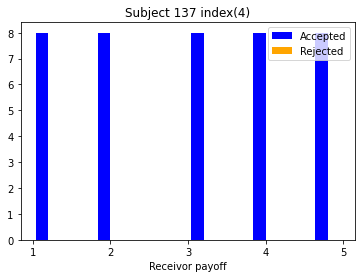

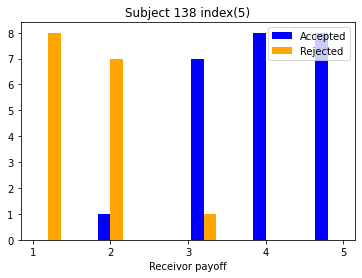

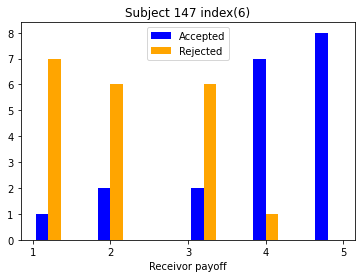

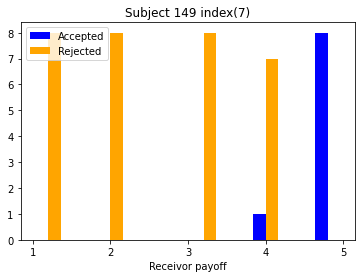

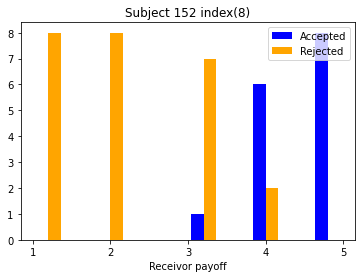

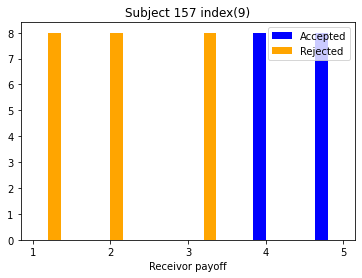

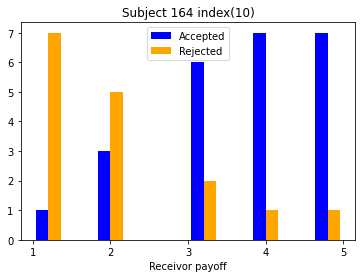

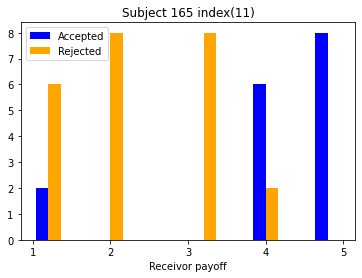

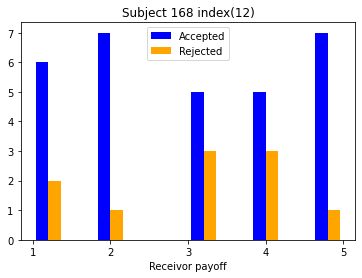

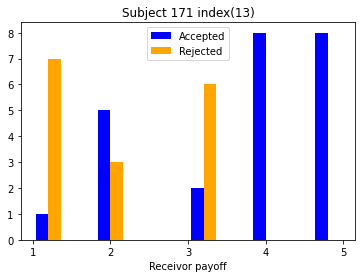

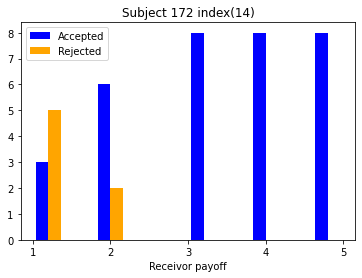

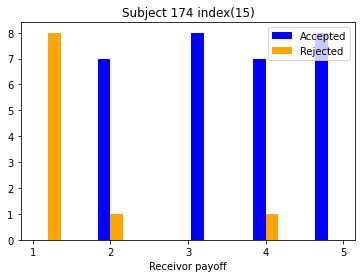

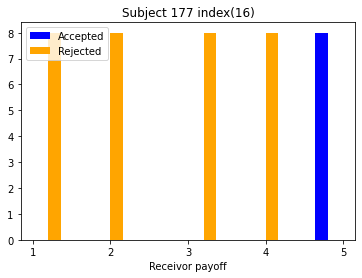

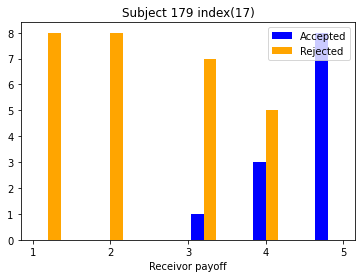

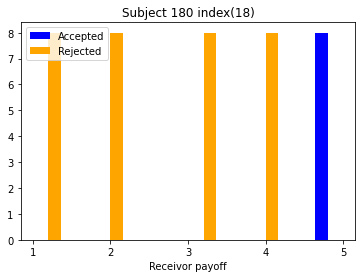

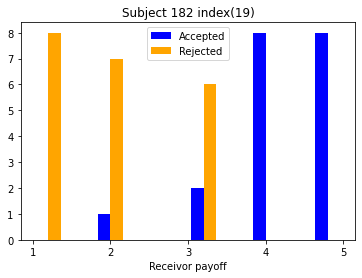

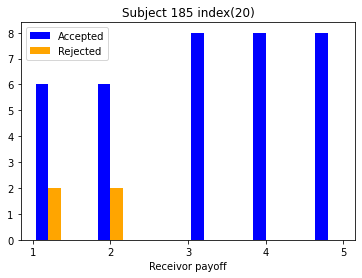

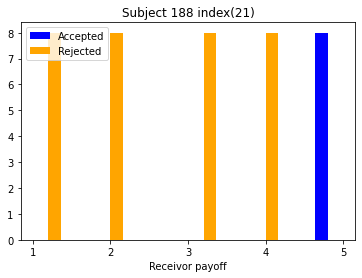

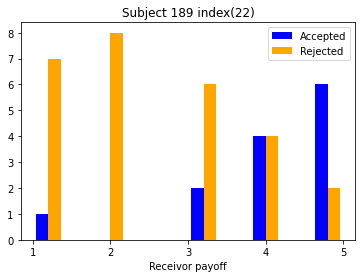

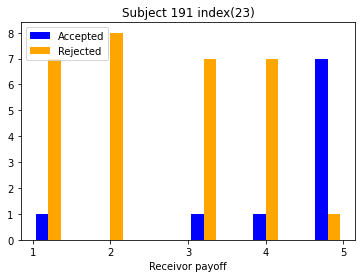

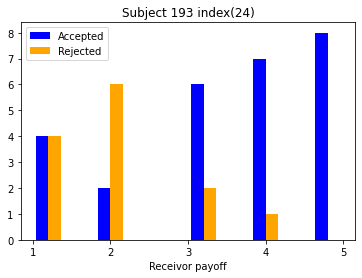

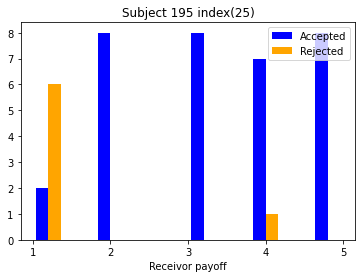

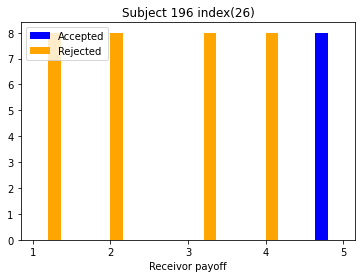

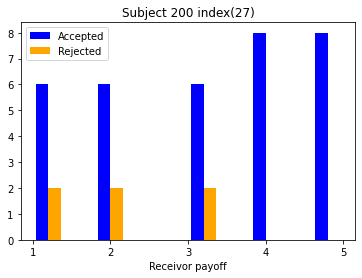

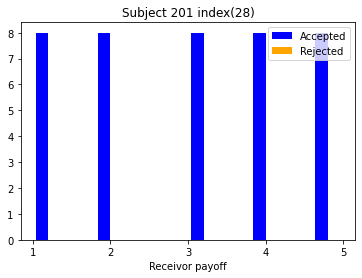

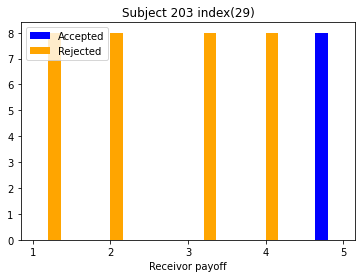

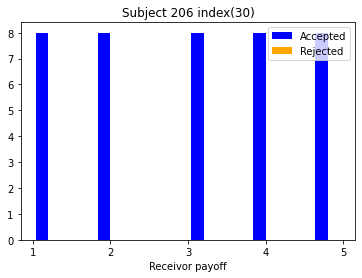

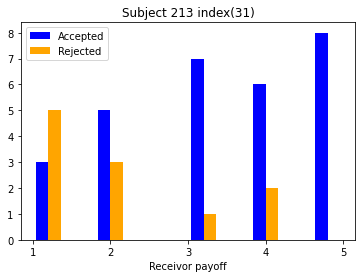

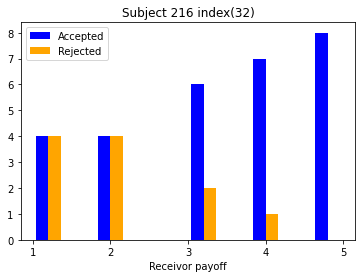

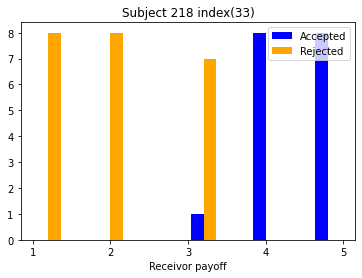

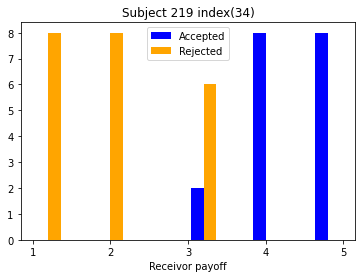

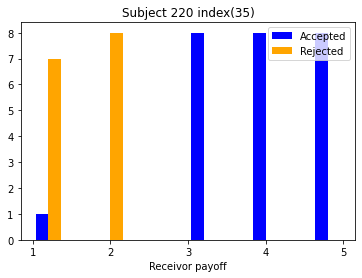

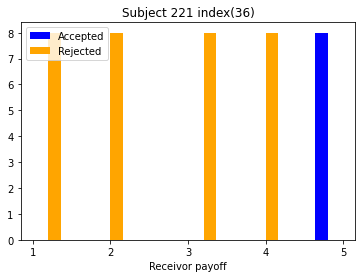

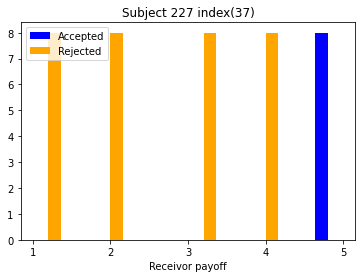

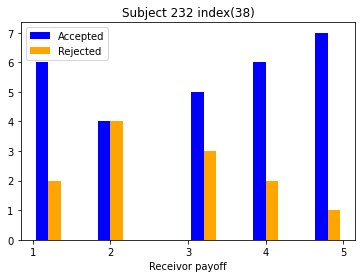

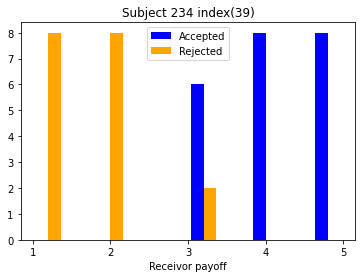

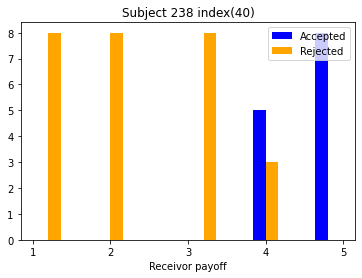

In [10]:
# Plotting histogram for subject with index 0-5
plot_histogram(range(0,41))


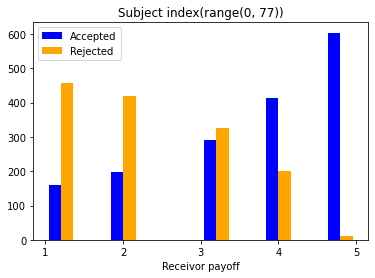

In [6]:
# Plotting histogram for all subjects
plot_histogram(range(number_of_subjects),individual_plots=False)

In [7]:
# Find all subjects who have accepted only
accepted_only_subjects = []
for i in range(number_of_subjects):

    sum = subjects_dataframe_gain[i].choose[subjects_dataframe_gain[i].choose == 1].sum()
    if sum == 40:
        accepted_only_subjects.append(i)
print(accepted_only_subjects)

[2, 4, 28, 30, 50, 53, 58, 70]


In [9]:
all_but_accepted_only_subjects=[]
for i in range(number_of_subjects):
    if not(i in accepted_only_subjects):
        all_but_accepted_only_subjects.append(i)

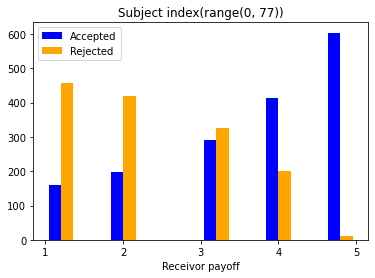

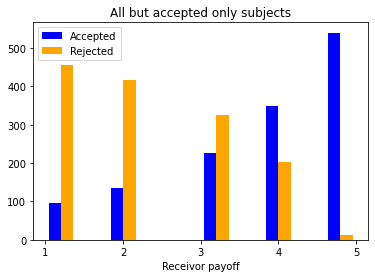

In [10]:
# Plotting histogram for all but subjects who have accepted only
plot_histogram(range(number_of_subjects),individual_plots=False)
plot_histogram(all_but_accepted_only_subjects,individual_plots=False,custom_titel="All but accepted only subjects")